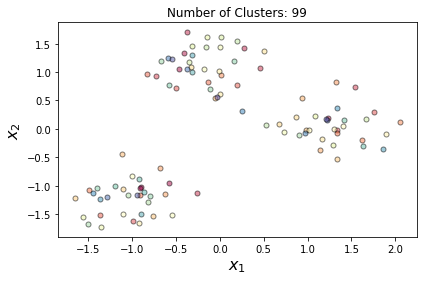

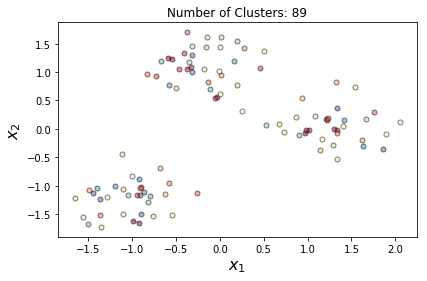

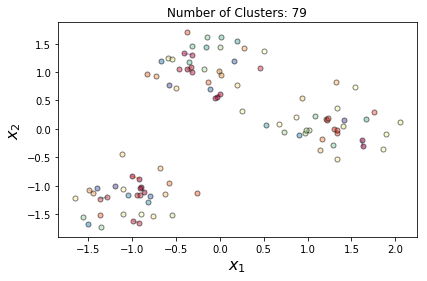

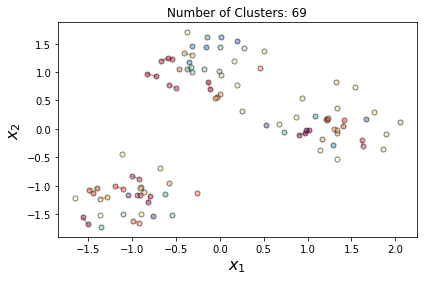

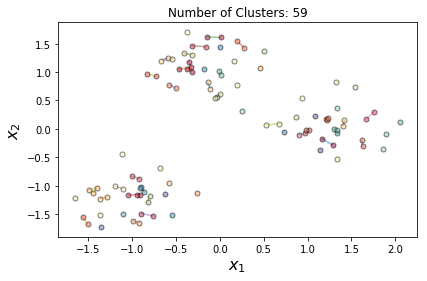

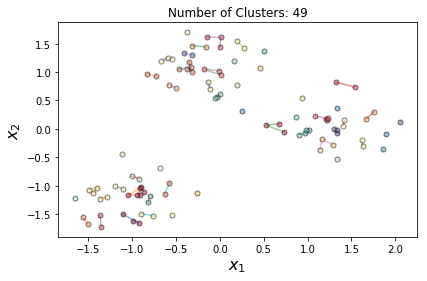

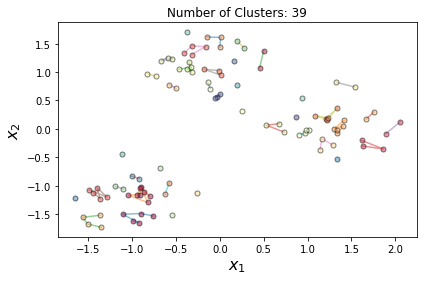

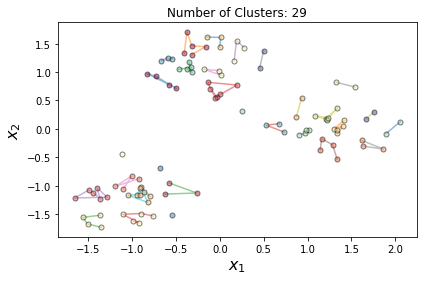

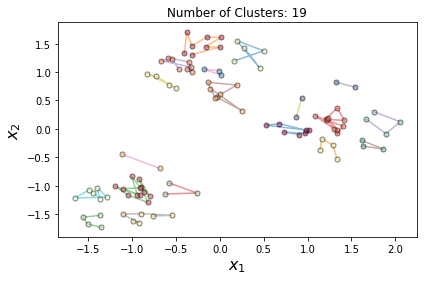

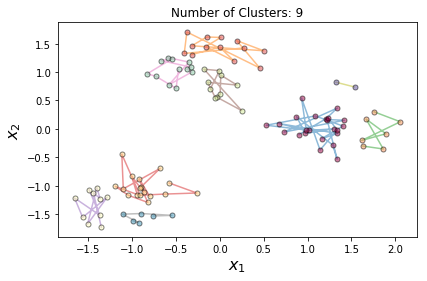

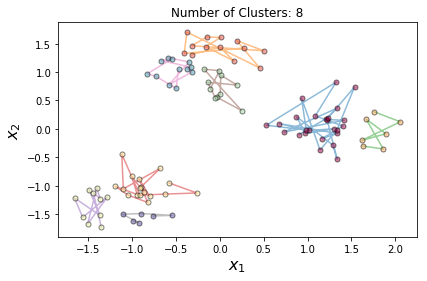

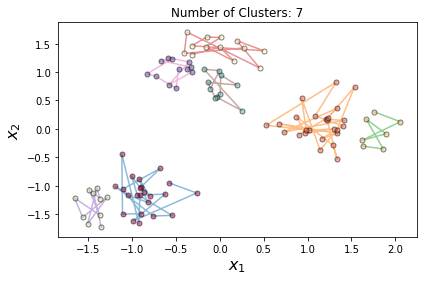

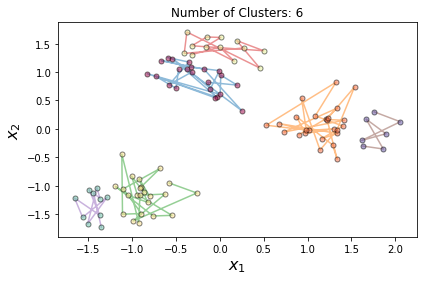

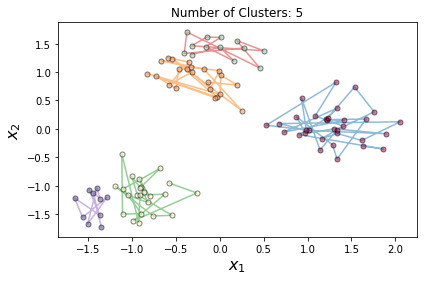

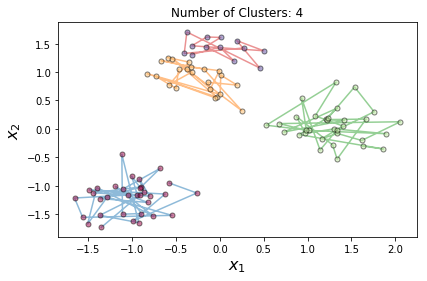

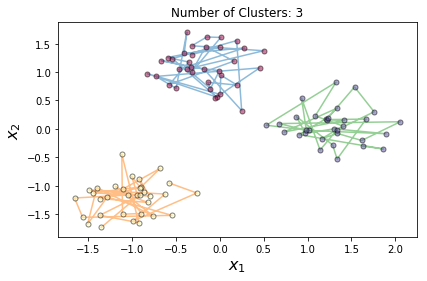

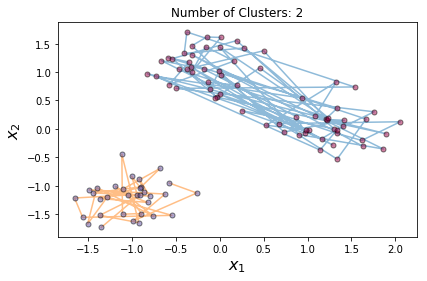

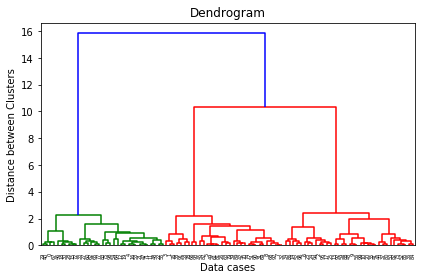

In [24]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import time
import sys
#plt.ion()
import pdb
n_clusters=3
n_labels=3
%matplotlib inline 
std=2

# Black removed and is used for noise instead.
def plot_clusters(labels,X,i):
  
    h = plt.figure()
    #   plt.clf()
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


    #print('colors:',colors)
    for k, col in zip(unique_labels, colors):
    #print('k:',k,'col:',col)
        class_member_mask = (labels == k)
        xy = X[class_member_mask]


        plt.plot(xy[:, 0], xy[:, 1], '-o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=5, alpha=0.5)
    #   if clusters is not None:
    #       colors2 = plt.cm.Spectral(np.linspace(0, 1, len(clusters)))
    #       for k, col in zip(np.arange(len(clusters)), colors2):
    #             plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=tuple(col),
    #              markeredgecolor='k', markersize=20,alpha=0.5)
    plt.xlabel('$x_1$',size=16) 
    plt.ylabel('$x_2$',size=16)
    #   if init:
    #       plt.title('Initial Centers')  
    #       h.tight_layout()
    #       h.savefig('kmeans_init.pdf')
    #   elif clusters is None:
    #       plt.title('Data')
    #       h.tight_layout()
    #       h.savefig('kmeans_data.pdf')
    #   else:
    #       plt.title('Iteration: %d, Total Inertia %.2f'%(i,inertia))  
    #       h.tight_layout()
    #       h.savefig('kmeans_'+str(i)+'.pdf')
    plt.title('Number of Clusters: %d'%(i))  
    h.tight_layout()
    h.savefig('hac/hac_'+str(i)+'.pdf')
##############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]

X, labels_true = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std, random_state=42)
X = StandardScaler().fit_transform(X)

##############################################################################
# Compute HAC
# good initialization
# np.random.seed(10)
# centers = np.random.randn(n_clusters, 2)
#bad initial start
# centers = np.array([(-1,-1.5),(-.75,-1),(1,1)])
# not enough clusters
# n_labels=2
# np.random.seed(10)
# centers = np.random.randn(n_labels, 2)
# too many clusters
np.random.seed(10)

cluster_range = np.hstack((np.arange(100)[::-10], np.arange(2,9)[::-1]))
for i in cluster_range:
  hac = AgglomerativeClustering(n_clusters=i).fit(X)
  labels = hac.labels_
  plot_clusters(labels,X,i)
  
# plot dendrogram
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'ward')
g = plt.figure()
dn = hierarchy.dendrogram(Z) #, labels = ['x'+str(i) for i,_ in enumerate(X)]) # orientation='right'
plt.title('Dendrogram')
plt.ylabel('Distance between Clusters')
plt.xlabel('Data cases')
plt.tight_layout()
g.savefig('hac/dendrogram.pdf')

plt.show()

In [ ]:
# generate example data

import numpy as np
from sklearn.datasets.samples_generator import make_blobs
n_clusters = 3

X, labels = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std,random_state=0)

for i in range(100):
    m = KMeans(n_clusters=n_clusters, n_init=1,init='random',max_iter=1).fit(X)